## Vector-valued function with Random Fourier Features

### Imports

In [1]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

### Values

In [2]:
dimension = 2
sigma = 10
sigma2 = 2*sigma**2

# Random Fourier features
m = 20 # number of samples
w = np.array([randn(m) / sigma, randn(m) / sigma]) # w is the same size as the dimensions times the number of samples
b = np.random.rand(m)*2*np.pi # b is the same size as number of samples

n = 500 # number of points

x1 = randn(n)/2
x2 =  randn(n)/2
x_vector = np.array([x1, x2])
# x_vector = np.block([x1,x2])

noise = randn(n) * 1e-1
#y1 = np.cos(x1) + noise
#y2 = np.sin(x2) + noise

y1 = 1+np.sin(x1/10) + x1**2 + noise
y2 = 0.5 * x2**2 + np.exp(x2) + noise

y = np.array(np.ravel([y1, y2], 'F'))

lam = 0.000001 # Regularization parameter
y.shape

(1000,)

### Gaussian Kernel

In [3]:
def k_gauss(x, z):
    k = np.exp(-((np.linalg.norm(x-z))**2)/(2*sigma**2))
    return k

def k_matrix(x, z, dim):
    k = k_gauss(x, z)
    k_matrix = k *np.eye(dim)
    return k_matrix

def K_gauss(x, n, dim):
    K = np.zeros((dim*n, dim*n))
    for i in range(0, n):
        for j in range(0, n):
            k = k_gauss(x[:,i], x[:,j])
            K[i*dim][j*dim] = k
            K[i*dim+1][j*dim+1] = k
    return K

K = K_gauss(x_vector, n, dimension)
K

array([[1.        , 0.        , 0.99867425, ..., 0.        , 0.99578262,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.99744965, 0.        ,
        0.99578262],
       [0.99867425, 0.        , 1.        , ..., 0.        , 0.99863215,
        0.        ],
       ...,
       [0.        , 0.99744965, 0.        , ..., 1.        , 0.        ,
        0.99972754],
       [0.99578262, 0.        , 0.99863215, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.99578262, 0.        , ..., 0.99972754, 0.        ,
        1.        ]])

#### Alpha

In [4]:
# Returns a vector with length dim * n
def alpha(x, y, lam, n, dim):
    K = K_gauss(x, n, dim)
    alpha_vector = np.linalg.inv((K + lam*np.eye(dim*n))) @ y
    alpha_reshape = [alpha_vector[::2], alpha_vector[1::2]]
    return np.array(alpha_reshape)

alpha_ = alpha(x_vector, y, lam, n, dimension)
alpha_

array([[-1.37613895e+05,  3.77208306e+05,  1.74001431e+05,
         1.43450150e+05, -3.92309932e+04,  2.53097224e+04,
        -5.27574182e+04, -2.31354276e+04,  5.07525855e+04,
        -5.57060194e+04,  7.23343036e+04,  1.81166475e+04,
        -5.95801944e+04,  8.49256650e+04, -1.70743717e+05,
        -5.80491253e+04, -8.10722295e+04,  8.15934419e+03,
         1.40479768e+05, -9.04645350e+04, -1.41505485e+05,
         1.59158103e+05,  5.73834846e+04,  1.94092368e+05,
         2.63372329e+05,  1.30239171e+05, -9.98691957e+04,
         1.53476526e+05, -3.08945753e+04, -2.23725244e+04,
        -1.20298206e+05, -3.86647521e+04,  2.70652862e+04,
         9.28128979e+03,  1.33258066e+05,  1.77309542e+03,
        -1.23784745e+05,  1.62070428e+04,  1.58339936e+05,
         7.02325018e+04,  2.30909516e+04, -7.02173353e+04,
        -1.21730927e+05, -6.46010847e+04, -4.73932178e+04,
        -5.53993641e+04, -5.67029183e+04,  1.13410746e+05,
         1.06526964e+04, -1.65749496e+03,  1.64444494e+0

#### Estimated function

In [5]:
def estimated_function(alpha, x, n, dim):
    function = np.zeros((2, n))
    for i in range(n):
        sum = np.zeros((2))
        x_i = x[:, i]
        for j in range(n):
            k = k_gauss(x_i, x[:, j])
            kernel = k*np.eye(dim)
            sum = sum + kernel@alpha[:, j]
        function[:, i] = sum 
    return function

func = estimated_function(alpha_, x_vector, n, dimension)
func

array([[1.09186873, 0.99920472, 1.00754434, 0.9960092 , 1.26848617,
        2.13383164, 0.98226865, 1.00891386, 1.0003612 , 1.11215429,
        1.1741266 , 1.01783915, 1.04323621, 0.99793897, 1.01201192,
        1.06664166, 0.97647385, 2.36669758, 1.7366381 , 1.77138019,
        1.40257017, 1.15681274, 1.03502036, 1.04036114, 1.41808003,
        1.01917194, 1.06821258, 1.135246  , 1.12515564, 0.97288802,
        1.50870548, 1.0713759 , 1.25042597, 1.17226721, 1.11611321,
        1.02592703, 1.11976554, 1.32305731, 1.00251417, 1.07581023,
        1.0200464 , 0.99911107, 1.00658799, 1.18171565, 1.41798559,
        1.30781742, 1.05486658, 1.43030907, 1.00329823, 0.99254032,
        1.08957605, 1.19109525, 1.22742375, 1.10010841, 1.47568408,
        1.36959684, 1.03956028, 1.00263282, 1.03450578, 1.00168856,
        0.99154438, 1.29025302, 1.06711149, 1.02099499, 1.77410275,
        1.04335625, 1.78672082, 2.48326001, 1.00518465, 0.98074774,
        1.31350393, 0.98908193, 1.00014896, 1.20

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_22120\2062984262.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_22120\2062984262.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


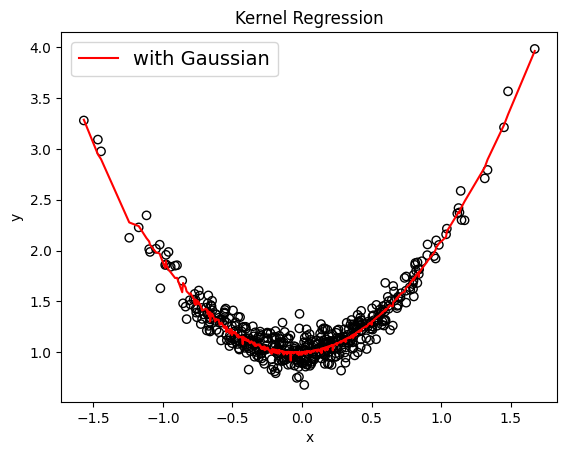

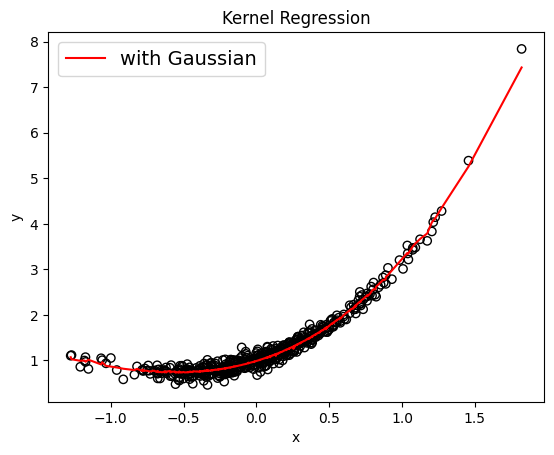

In [6]:
# Plot for x1 and y1
f1_sort = np.array([x for _,x in sorted(zip(x1,func[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort = np.array([x for _,x in sorted(zip(x2,func[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort, c="r", label="with Gaussian")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()

### With Random Fourier Features

#### Psi

In [7]:
def psi(x, w, b):
    return np.sqrt(2) * np.cos(w.T@x + b)

def psi_vector(x, w, b, m):
    psi_vector = np.zeros(m)
    for i in range(m):
        psi_vector[i] = psi(x, w[:, i], b[i])
    return np.array(psi_vector)

def capital_psi(x, w,b, m, dim):
    psi = psi_vector(x,w,b,m)
    return np.kron(psi, np.eye(dim))

capital_psi(x_vector[:, 1], w, b, m, dimension)

array([[-1.40217047, -0.        , -1.29573504, -0.        ,  1.41141021,
         0.        ,  0.95088217,  0.        , -1.28558018, -0.        ,
         1.38474571,  0.        , -1.25877188, -0.        , -0.59912183,
        -0.        ,  0.68752098,  0.        ,  0.8256626 ,  0.        ,
         0.96567929,  0.        ,  1.10848103,  0.        , -0.44666254,
        -0.        ,  1.41309647,  0.        ,  1.22160605,  0.        ,
        -0.08084589, -0.        , -1.2702454 , -0.        , -1.25272759,
        -0.        , -1.4134544 , -0.        , -0.80502594, -0.        ],
       [-0.        , -1.40217047, -0.        , -1.29573504,  0.        ,
         1.41141021,  0.        ,  0.95088217, -0.        , -1.28558018,
         0.        ,  1.38474571, -0.        , -1.25877188, -0.        ,
        -0.59912183,  0.        ,  0.68752098,  0.        ,  0.8256626 ,
         0.        ,  0.96567929,  0.        ,  1.10848103, -0.        ,
        -0.44666254,  0.        ,  1.41309647,  0.

#### Phi

In [8]:
def phi(x, w, b, n, m, dim):
    phi = np.zeros((dim*n, dim*m))
    for i in range(0, n):
        psi = capital_psi(x[:,i], w, b, m, dim)
        phi[dim*i] = psi[0]
        phi[dim*i+1] = psi[1]
    return phi

phi_ = phi(x_vector, w, b, n, m, dimension)
phi_

array([[-1.39357937, -0.        , -1.28991574, ..., -0.        ,
        -0.82886981, -0.        ],
       [-0.        , -1.39357937, -0.        , ..., -1.41306275,
        -0.        , -0.82886981],
       [-1.40217047, -0.        , -1.29573504, ..., -0.        ,
        -0.80502594, -0.        ],
       ...,
       [-0.        , -1.40680316, -0.        , ..., -1.41421026,
        -0.        , -0.77710872],
       [-1.40977485, -0.        , -1.32034513, ..., -0.        ,
        -0.75450211, -0.        ],
       [-0.        , -1.40977485, -0.        , ..., -1.41361477,
        -0.        , -0.75450211]])

#### Alpha

In [9]:
def alpha_approx(x_vector, y, dim, m, lam):
    phi_ = phi(x_vector, w, b, n, m, dimension)
    alpha = np.linalg.inv(phi_.T @ phi_ + lam*np.eye(dim*m)) @ (phi_.T@y)
    return alpha

alpha_approximation = alpha_approx(x_vector, y, dimension, m, lam)
alpha_approximation.shape

(40,)

#### Function Approximation

In [10]:
def function_approximation(alpha, x, n, dim):
    f = np.zeros((dim, n))
    for i in range(n):
        f[:, i] = capital_psi(x[:, i], w, b, m, dim) @ alpha
    return f

# Evt: Gir samme resultat
def func_2(alpha, phi):
    func = phi @ alpha
    return np.array([func[::2], func[1::2]])

function_estimate = function_approximation(alpha_approximation, x_vector, n, dimension)
function_estimate

array([[1.09256961, 0.99973737, 1.00911083, 0.99721068, 1.2700597 ,
        2.13300122, 0.98582282, 1.00951485, 1.00073716, 1.11277319,
        1.17531272, 1.0172009 , 1.04369989, 0.99398345, 1.01276221,
        1.06766349, 0.9782831 , 2.36548076, 1.73339939, 1.76909771,
        1.40000043, 1.15539065, 1.03547317, 1.04054402, 1.41628579,
        1.02014621, 1.06893513, 1.13478326, 1.12534962, 0.97509896,
        1.51033851, 1.07222186, 1.25160036, 1.173542  , 1.11659755,
        1.02645583, 1.11861056, 1.32015484, 1.00305284, 1.07686078,
        1.02086061, 0.99969192, 1.00655546, 1.18076642, 1.41759673,
        1.30598033, 1.05495025, 1.4278967 , 1.003857  , 0.99278455,
        1.09056034, 1.19014617, 1.22649581, 1.1011437 , 1.47733197,
        1.37096982, 1.03910403, 1.00273254, 1.03527224, 1.00199386,
        0.99198122, 1.29077895, 1.06661018, 1.02113376, 1.77243204,
        1.04408888, 1.78686411, 2.48301913, 1.0055655 , 0.98231853,
        1.31122731, 0.98952015, 0.99596829, 1.20

#### Plot

C:\Users\vilde\AppData\Local\Temp\ipykernel_22120\2458617684.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
C:\Users\vilde\AppData\Local\Temp\ipykernel_22120\2458617684.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  g.show()


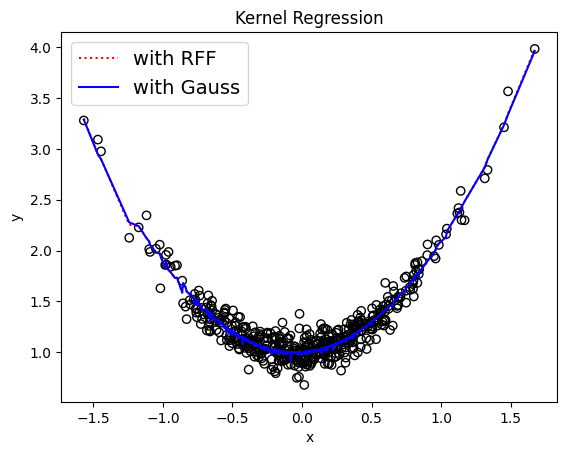

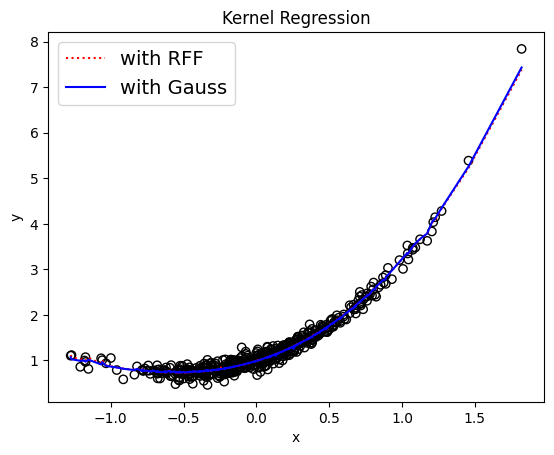

In [15]:
# Plot for x1 and y1
f1_sort_approx = np.array([x for _,x in sorted(zip(x1,function_estimate[0]))])

f = plt.figure(1)
plt.scatter(x1,y1, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x1), f1_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x1), f1_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
f.show()

# Plot for x2 and y2
f2_sort_approx = np.array([x for _,x in sorted(zip(x2,function_estimate[1]))])

g = plt.figure(2)
plt.scatter(x2,y2, facecolors ='none' , edgecolors = "k" , marker = "o")
plt.plot(np.sort(x2), f2_sort_approx, c="r", label="with RFF", ls = ":")
plt.plot(np.sort(x2), f2_sort, c="b", label="with Gauss")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Kernel Regression")
plt.legend( loc = "upper left" , frameon = True , prop ={'size': 14 } )
g.show()